# Essentially, testing out my pipeline

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, pickle
import numpy as np
import matplotlib.pyplot as plt
from cv2 import SIFT_create, imread, cvtColor, COLOR_BGR2GRAY, GaussianBlur
from skimage.io import imread

from scripts.utils import extract_frames_info
from scripts.display_utils import show_image_with_bbs
from scripts.hog.classifier import HOGClassifier


/gpfs/users/prevotb/.conda/envs/opencv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
frames_info = extract_frames_info("data/train.csv")

In [16]:
classifier = HOGClassifier()

features, labels = classifier.features_labels(frames_info[:10], 1)

100%|██████████| 10/10 [00:00<00:00, 10010.27it/s]


In [19]:
features[1].shape

(34560,)

In [4]:
with open("models/hog/ultra_neg_64_8.pkl", "rb") as pickle_file:
    classifier = pickle.load(pickle_file)

[1]


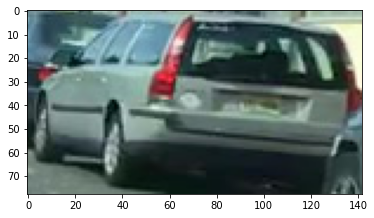

In [42]:
image_index = 100
image = imread(frames_info[image_index][0])

car_index = 5

car_bb = frames_info[image_index][1][car_index]
car_image = image[car_bb[1]: car_bb[1]+car_bb[3], car_bb[0]: car_bb[0]+car_bb[2]]
plt.imshow(car_image)
print(classifier.predict(car_image))

[1]


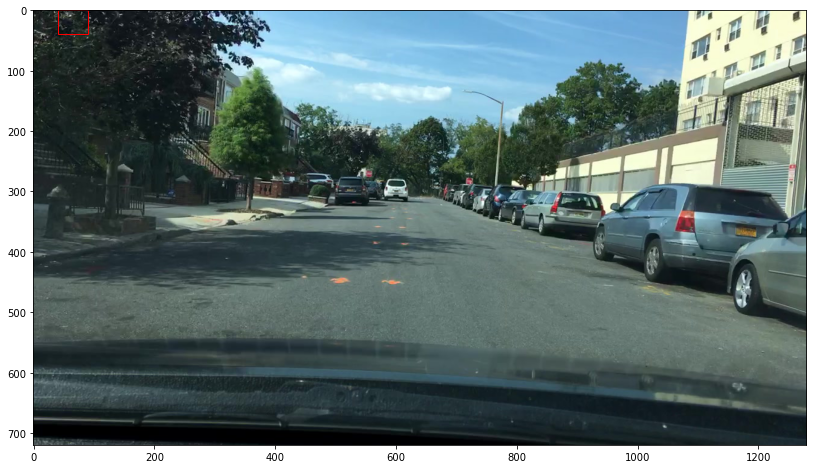

In [66]:
image_index = 100
image = imread(frames_info[image_index][0])

car_bb = [500, 250, 150, 100]
car_image = image[car_bb[1]: car_bb[1]+car_bb[3], car_bb[0]: car_bb[0]+car_bb[2]]
print(classifier.predict(car_image))
show_image_with_bbs(frames_info[image_index][0], [car_bb])

## Testing detection

In [5]:
from scripts.hog.detector import Detector
import pickle
from skimage.io import imread
from scripts.display_utils import show_image_with_bbs

In [6]:
detector = Detector(classifier)

In [19]:
image_index = 1200
image = imread(frames_info[image_index][0])

detections = detector.detect(image, 10, [64, 128, 256, 400], [.8, 0.5, 1.0])

100%|██████████| 12/12 [06:41<00:00, 33.45s/it]


In [20]:
print(len(detections))
detections = detector.nms(detections, .5)

94


35


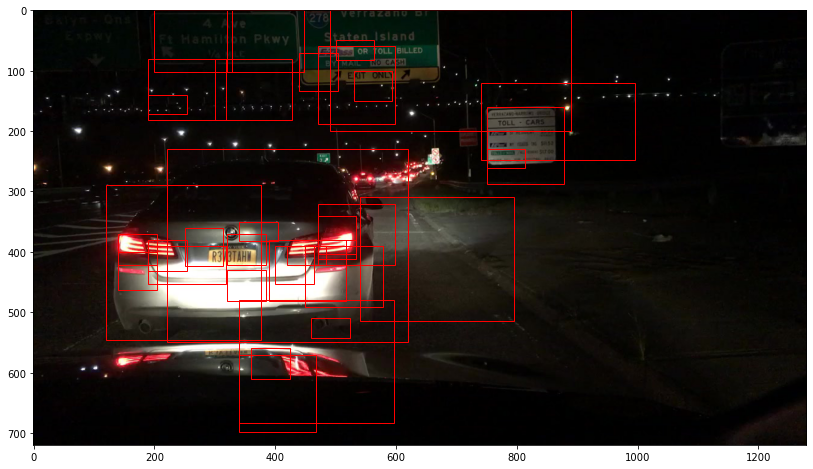

In [21]:
print(len(detections))

show_image_with_bbs(frames_info[image_index][0], detections)


## Misc

In [ ]:
bounding_boxes = [[0, 0, 5, 5], [5, 5, 5, 5]]

For simplicity, let's say they are the same for all test images (yours won't be). Then, we can create a Kaggle submission file like this:

In [ ]:
test_files = sorted(os.listdir('./test/'))

rows = []

for file_name in test_files:

    rle = run_length_encoding(bounding_boxes_to_mask(bounding_boxes, H, W))
    rows.append(['test/' + file_name, rle])

df_prediction = pd.DataFrame(columns=['Id', 'Predicted'], data=rows).set_index('Id')
df_prediction.to_csv('sample_submission.csv')